## Strategies to Deal with Imbalanced Data

1. Over samplin
2. Under samplin
3. SMOT
4. Cost function with weight
5. Tunning Hyperparameter

In [78]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *
import datetime

In [79]:
train_set = pd.read_csv("../../fraud_data/fraudTrain.csv")
train_set.shape

(1296675, 23)

In [80]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [81]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [82]:
train_set['trans_date_trans_time'] = datetime.datetime.strptime(train_set['trans_date_trans_time'][0][:8]+'01', "%Y-%m-%d").date()

In [83]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [84]:
train_set.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [85]:
count_is_fraud = pd.DataFrame(train_set.groupby('is_fraud')['is_fraud'].aggregate(qty_n = 'count'))
count_is_fraud.index.name = "is_fraud"
count_is_fraud.reset_index(inplace=True)
count_is_fraud['is_fraud'] = count_is_fraud.is_fraud.astype('category')

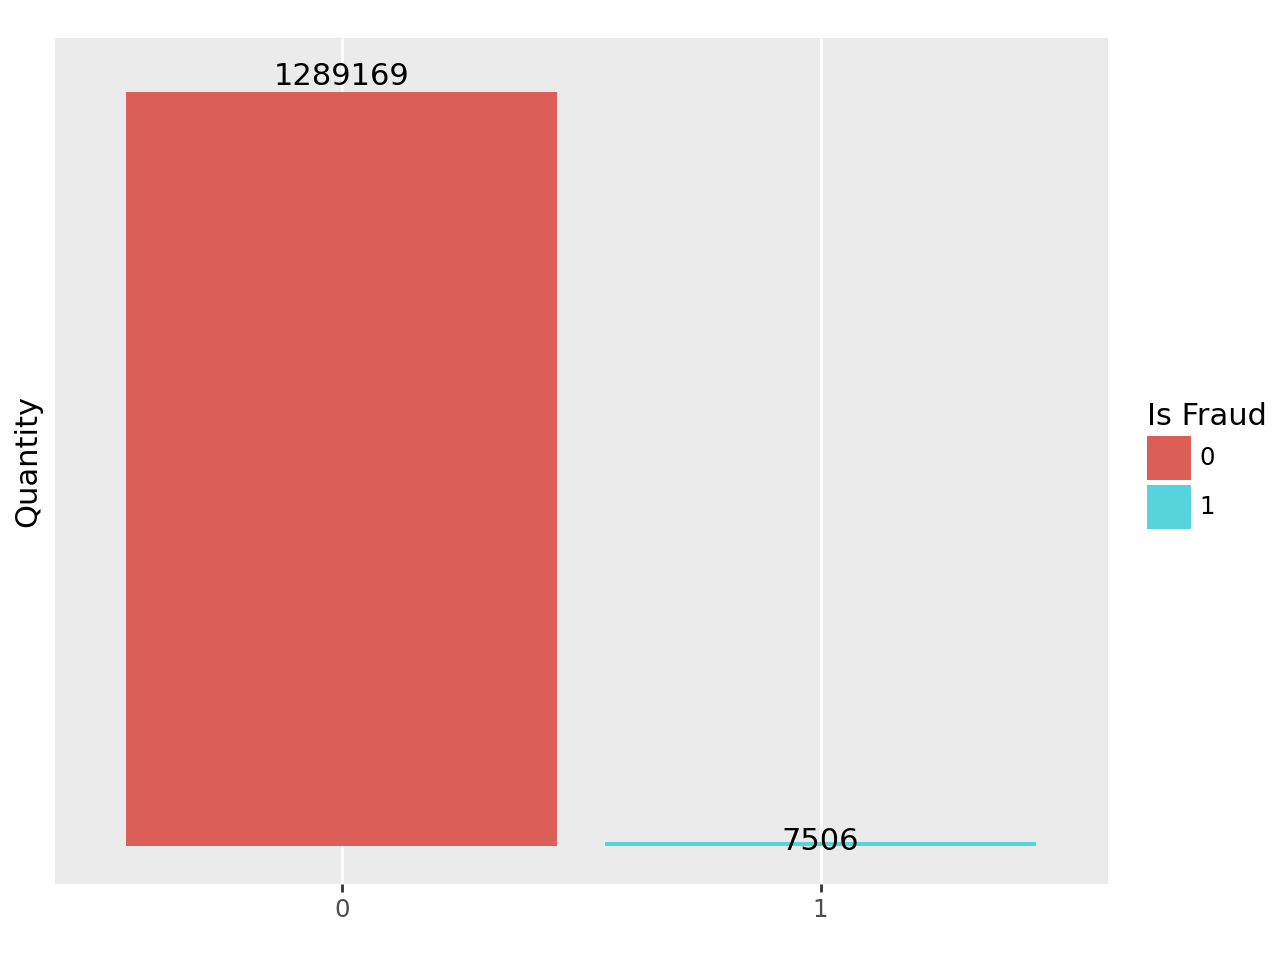

<Figure Size: (640 x 480)>

In [86]:
(
    ggplot(data=count_is_fraud)+
    geom_col(aes(x='is_fraud', y='qty_n', fill='is_fraud'))+
    scale_y_continuous(
        name='Quantity',
        labels="",
        breaks=""
    )+
    geom_text(aes(x='is_fraud', y='qty_n', label='qty_n'), position=position_stack(vjust=1.02))+
    labs(x="", fill="Is Fraud")
)

In [87]:
train_set_final = train_set.drop(['cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'merchant'], axis=1)

It'll be used CatBoost for Classification in this notebook, since there is a lot of categorical values with countless categories.

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics  import f1_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, precision_score, accuracy_score
from catboost import CatBoostClassifier

In [163]:
class CB:

    def __init__(self, model, train_x, train_y, validation_x, validation_y):

        self.model = model    
        self.train_x = train_x
        self.train_y = train_y
        self.validation_x = validation_x
        self.validation_y = validation_y
        self.predictions = self.predict()

    def predict(self):

        self.model.fit(self.train_x, self.train_y)
        predictions_inside = pd.DataFrame(self.model.predict(self.train_x))
        proba_inside = pd.DataFrame(self.model.predict_proba(self.train_x)[::, 1])
        predictions_outside = pd.DataFrame(self.model.predict(self.validation_x))
        proba_outside = pd.DataFrame(self.model.predict_proba(self.validation_x)[::, 1])

        predict_inside = pd.concat([predictions_inside, proba_inside], axis=1).set_axis(['predict_inside', 'proba_inside'], axis=1)
        predict_outside = pd.concat([predictions_outside, proba_outside], axis=1).set_axis(['predict_outside', 'proba_outside'], axis=1)

        return({'inside': predict_inside, 'outside': predict_outside})

    def scores(self):

        accuracy = accuracy_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        precision = precision_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        recall = recall_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        f1 = f1_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        roc_auc = roc_auc_score(y_true=self.validation_y, y_score=self.predictions['outside']['proba_outside'])

        all_scores = pd.DataFrame([accuracy, precision, recall, f1, roc_auc]).T.\
            rename(columns={0:'accuracy', 1:'precision', 2:'recall', 3:'f1', 4:'roc_auc'})
        
        return(all_scores)

    def PR_curve(self):
    
        threshold_proba = self.predictions['outside']['proba_outside']
        precisions, recalls, _ = precision_recall_curve(y_true=self.validation_y, probas_pred=threshold_proba)

        return(pd.concat([pd.DataFrame(precisions), pd.DataFrame(recalls)], axis=1).set_axis(['precision', 'recall'], axis=1))

In [ ]:
features = train_set_final.drop(['is_fraud'], axis=1)
target = train_set_final['is_fraud']

In [ ]:
cat_features = list(train_set_final.select_dtypes("object").columns.to_list())
cat_features_index = [train_set_final.columns.get_loc(col) for col in cat_features]

### CatBoost without any strategy

In [ ]:
train_x, validation_x, train_y, validation_y = train_test_split(features, target, test_size=0.3, random_state=1234, stratify=target)

In [ ]:
cat_boost = CatBoostClassifier(iterations=50, cat_features=cat_features_index, loss_function="Logloss", verbose=True)
cat_boost.fit(train_x, train_y)
predict_catboost = cat_boost.predict(validation_x)
score = recall_score(y_true=validation_y, y_pred=predict_catboost)
print(f"Recall Score for CatBoost: {score:.3%}".format(score))

Learning rate set to 0.5
0:	learn: 0.0857652	total: 917ms	remaining: 3m 2s
1:	learn: 0.0242443	total: 2.48s	remaining: 4m 5s
2:	learn: 0.0184541	total: 3.23s	remaining: 3m 32s
3:	learn: 0.0159074	total: 3.62s	remaining: 2m 57s
4:	learn: 0.0154417	total: 4.3s	remaining: 2m 47s
5:	learn: 0.0148040	total: 5.05s	remaining: 2m 43s
6:	learn: 0.0121985	total: 5.71s	remaining: 2m 37s
7:	learn: 0.0119559	total: 6.37s	remaining: 2m 32s
8:	learn: 0.0108015	total: 6.91s	remaining: 2m 26s
9:	learn: 0.0106581	total: 7.57s	remaining: 2m 23s
10:	learn: 0.0104433	total: 8.29s	remaining: 2m 22s
11:	learn: 0.0102270	total: 8.93s	remaining: 2m 19s
12:	learn: 0.0101109	total: 9.61s	remaining: 2m 18s
13:	learn: 0.0100530	total: 10.3s	remaining: 2m 16s
14:	learn: 0.0099343	total: 11s	remaining: 2m 15s
15:	learn: 0.0098542	total: 11.8s	remaining: 2m 15s
16:	learn: 0.0096853	total: 12.5s	remaining: 2m 14s
17:	learn: 0.0096358	total: 13.5s	remaining: 2m 16s
18:	learn: 0.0095957	total: 14.2s	remaining: 2m 15s
19

In [170]:
cat_boost = CatBoostClassifier(iterations=200, cat_features=cat_features_index, loss_function="Logloss", verbose=True)
# cat_boost.fit(train_x, train_y)
# proba = cat_boost.predict_proba(validation_x)
# predit = cat_boost.predict(validation_x)

In [171]:
teste = CB(cat_boost, train_x=train_x, train_y=train_y, validation_x=validation_x, validation_y=validation_y).PR_curve()

Learning rate set to 0.5
0:	learn: 0.0884760	total: 1.26s	remaining: 4m 10s
1:	learn: 0.0497451	total: 3.15s	remaining: 5m 11s
2:	learn: 0.0274609	total: 6.84s	remaining: 7m 29s
3:	learn: 0.0185487	total: 12.7s	remaining: 10m 22s
4:	learn: 0.0166927	total: 15.6s	remaining: 10m 8s
5:	learn: 0.0154456	total: 17s	remaining: 9m 9s
6:	learn: 0.0150980	total: 18.1s	remaining: 8m 20s
7:	learn: 0.0147284	total: 19.3s	remaining: 7m 42s
8:	learn: 0.0127229	total: 20.7s	remaining: 7m 19s
9:	learn: 0.0121426	total: 22.2s	remaining: 7m 1s
10:	learn: 0.0118826	total: 23.7s	remaining: 6m 47s
11:	learn: 0.0108863	total: 25.1s	remaining: 6m 33s
12:	learn: 0.0106803	total: 26.5s	remaining: 6m 21s
13:	learn: 0.0105412	total: 27.9s	remaining: 6m 10s
14:	learn: 0.0104968	total: 29.3s	remaining: 6m 1s
15:	learn: 0.0101740	total: 30.8s	remaining: 5m 54s
16:	learn: 0.0098903	total: 32.2s	remaining: 5m 46s
17:	learn: 0.0097404	total: 33.6s	remaining: 5m 39s
18:	learn: 0.0095499	total: 35.1s	remaining: 5m 34s
1

In [172]:
teste

,precision,recall
0,0.005789,1.000000
1,0.005789,1.000000
2,0.005789,1.000000
3,0.005789,1.000000
4,0.005789,1.000000
...,...,...
374337,1.000000,0.001776
374338,1.000000,0.001332
374339,1.000000,0.000888
374340,1.000000,0.000444


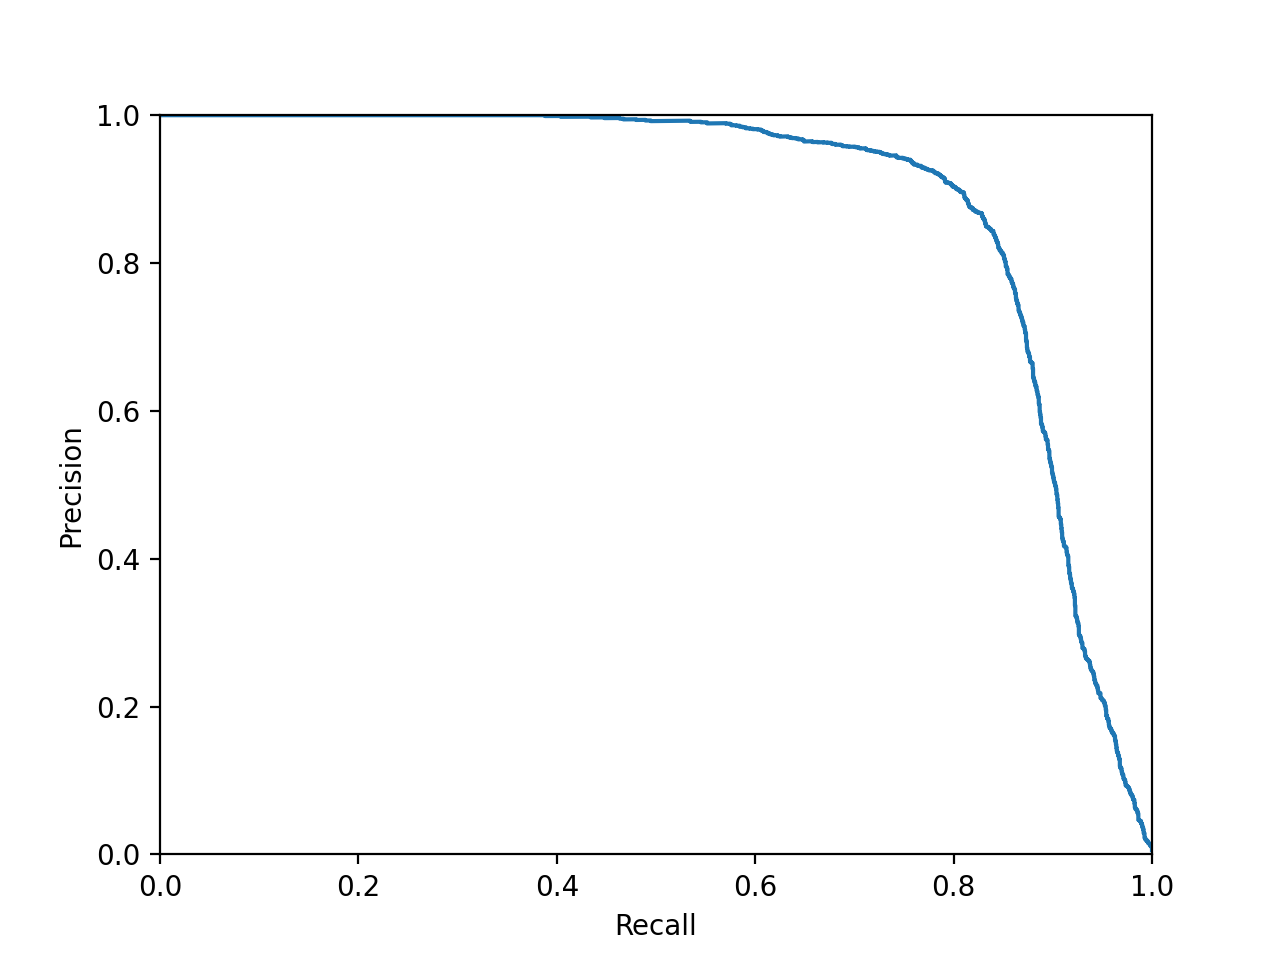

In [173]:
plt.plot(teste['recall'], teste['precision'])
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()